In [121]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
import numpy as np
import matplotlib.pyplot as plt
from rl_envs_forge.envs.network_graph.network_graph import NetworkGraph

from algos import *

In [123]:

def init_env():
    connectivity_matrix = np.array(
        [
            # 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
            [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # 1
            [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # 2
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 3
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 4
            [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 5
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # 6
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],  # 7
            [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # 8
            [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # 9
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],  # 10
            [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],  # 11
            [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],  # 12
            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # 13
            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # 14
            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # 15
        ]
    )

    desired_centrality = np.array(
        [0.08, # 1
        0.06, # 2
        0.14, # 3
        0.08, # 4
        0.04, # 5
        0.02, # 6
        0.06, # 7
        0.03, # 8
        0.04, # 9
        0.08, # 10
        0.13, # 11
        0.06, # 12
        0.04, # 13
        0.07, # 14
        0.07] # 15
    )  # Example centrality

    initial_opinions = np.linspace(0, 1, len(desired_centrality))

    env = NetworkGraph(
        connectivity_matrix=connectivity_matrix,
        desired_centrality=desired_centrality,
        initial_opinions=initial_opinions,
        max_u=0.2,
        budget=100.0,
        desired_opinion=1.0,
        tau=0.01,
        max_steps=1_000_000
    )

    env.reset()
    
    return env

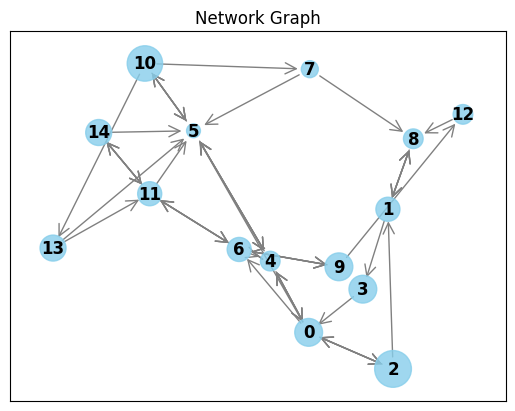

array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])

In [124]:
env = init_env()
env.render(mode="matplotlib")
env.reset()

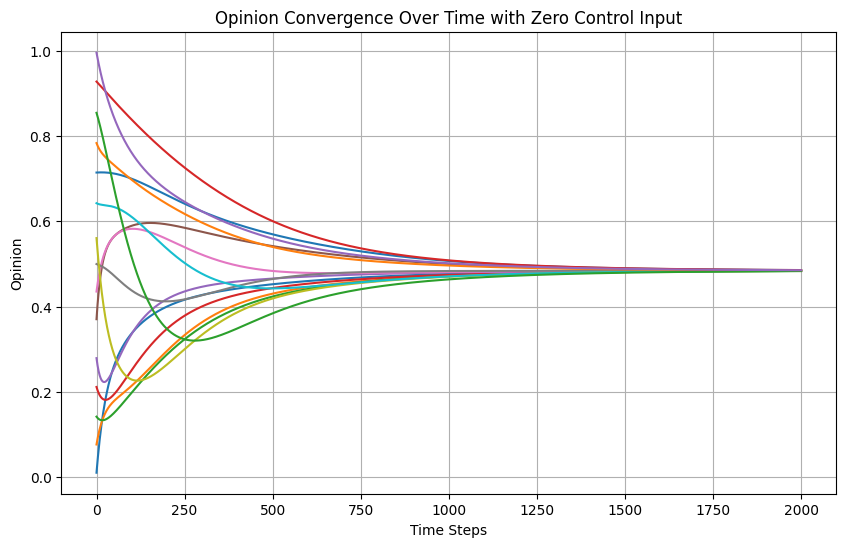

In [125]:
# Define the number of steps for which to apply the zero control input
num_steps = 2000

# Initialize an array to store opinions over time
opinions_over_time = np.zeros((num_steps, env.num_agents))

# Run the simulation with zero control input
for i in range(num_steps):
    no_action_u = np.zeros(env.num_agents)  # Zero control input
    opinions, reward, done, truncated, info = env.step(no_action_u)
    opinions_over_time[i] = opinions

plot_opinions_over_time(opinions_over_time)

In [126]:

env = init_env()

budget = 2

# Applying the optimal control strategy in the environment
optimal_u = optimal_control_action(env, budget=budget)
print(optimal_u)

opinions, reward, done, truncated, info = env.step(optimal_u)
opinions

[2.00000000e-01 2.00000000e-01 2.00000000e-01 2.00000000e-01
 2.00000000e-01 0.00000000e+00 2.00000000e-01 2.00000000e-01
 2.00000000e-01 2.00000000e-01 2.00000000e-01 2.77555756e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


array([0.20793985, 0.2611413 , 0.31331653, 0.36906885, 0.42250872,
       0.3749356 , 0.54760824, 0.59899892, 0.64844996, 0.71378704,
       0.77142373, 0.78444916, 0.85525784, 0.92771339, 0.99543713])

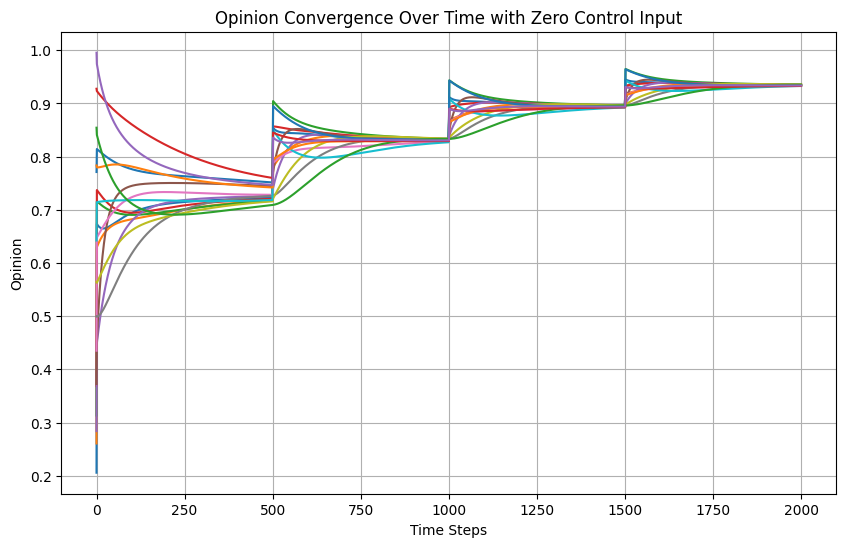

In [127]:
env = init_env()

# Define the number of steps for which to apply the zero control input
num_steps = 2000
k = 500  # Apply optimal control every k steps
N = 5  # Number of consecutive steps to apply optimal control
budget = 1  # Example budget

# Initialize an array to store opinions over time
opinions_over_time = np.zeros((num_steps, env.num_agents))

# Run the simulation
for i in range(num_steps):
    if i % k == 0:
        # Apply the optimal control every k steps for N consecutive steps
        for j in range(N):
            if i + j < num_steps:
                optimal_u = optimal_control_action(env, budget=budget)
                # print(f"Applying optimal control at step {i + j}: {optimal_u}")
                opinions, reward, done, truncated, info = env.step(optimal_u)
                opinions_over_time[i + j] = opinions
        # Skip the next N-1 steps as they are already processed
        i += N - 1
    else:
        # Apply zero control input at other steps
        optimal_u = np.zeros(env.num_agents)
        opinions, reward, done, truncated, info = env.step(optimal_u)
        opinions_over_time[i] = opinions

# Plot the collected opinions over time
plot_opinions_over_time(opinions_over_time)

In [128]:
env = init_env()
M = 3 # Number of campaigns
Q = 15  # Total budget

optimal_budget_allocation = brute_force_strategy(env, M, Q)
print("Optimal budget allocation:", optimal_budget_allocation)

Optimal budget allocation: [3 3 3 3]


In [129]:
env = init_env()

# Example usage with the environment
M = 5  # Number of campaigns
Q = 20  # Total budget

optimal_budget_allocation = dynamic_programming_strategy(env, M, Q)
print("Optimal budget allocation for each campaign:", optimal_budget_allocation)


Optimal budget allocation for each campaign: [4 3 3 3 3 4]


Optimal budget allocation (brute_force): [3 3 3 3]
Brute Force Strategy - Overall Error: 6.104991006235625
Final Error: 3.3306690738754696e-15


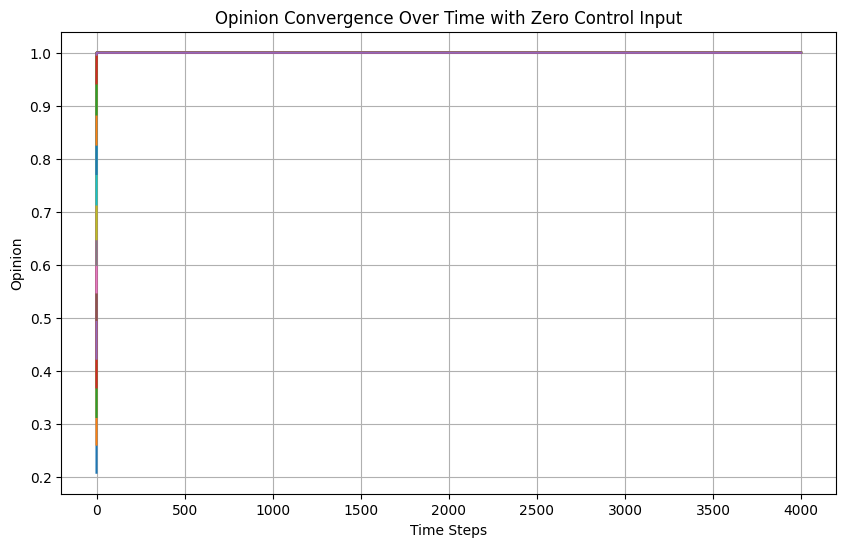

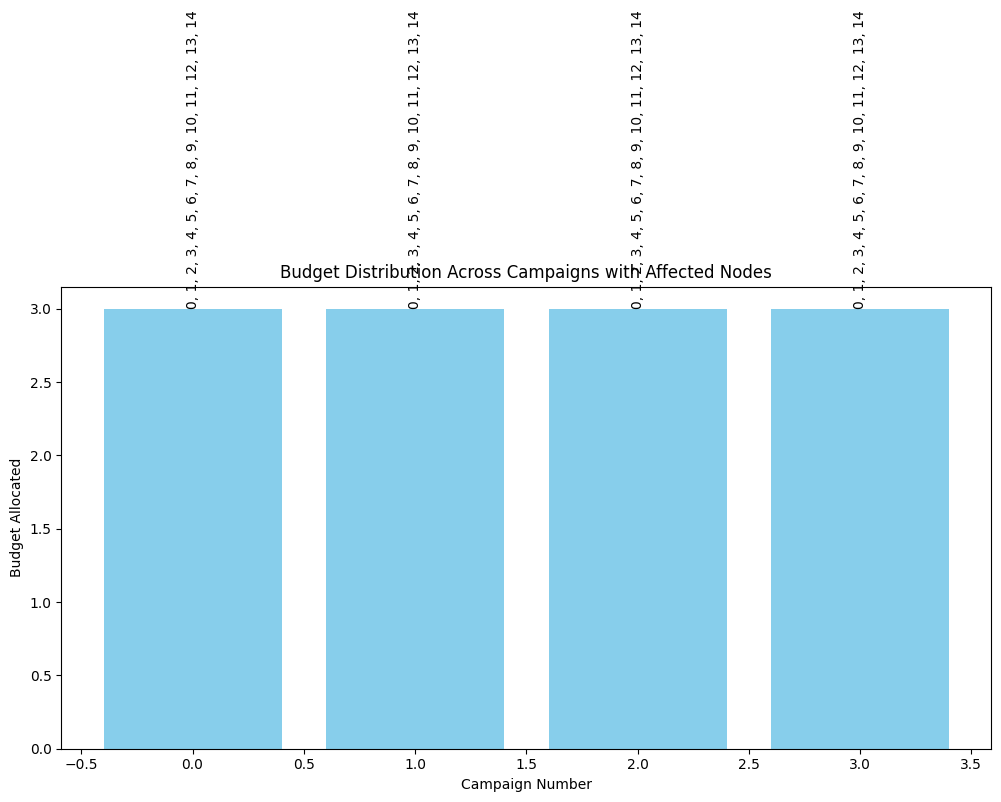

In [149]:
# Example usage
env = init_env()
num_steps = 4000  # Total number of steps in the simulation
M = 3  # Number of campaigns
Q = 15  # Total budget
campaign_length = 0.5  # Time step

# Run the experiment with brute force strategy
opinions_over_time, budget_distribution, affected_nodes = run_experiment(
    env, num_steps, M, Q, env.tau, strategy='brute_force', campaign_length=campaign_length)

# Compute errors
overall_error = compute_overall_error(opinions_over_time, env.desired_opinion)
final_error = compute_final_error(opinions_over_time, env.desired_opinion)

print(f"Brute Force Strategy - Overall Error: {overall_error}")
print(f"Final Error: {final_error}")

# Plot opinions over time
plot_opinions_over_time(opinions_over_time)

# Plot budget distribution and affected nodes
plot_budget_distribution(budget_distribution, affected_nodes)

Optimal budget allocation (brute_force): [3 3 3 3]
Brute Force Strategy - Overall Error: 18280.515590749153
Final Error: 3.168549164594347


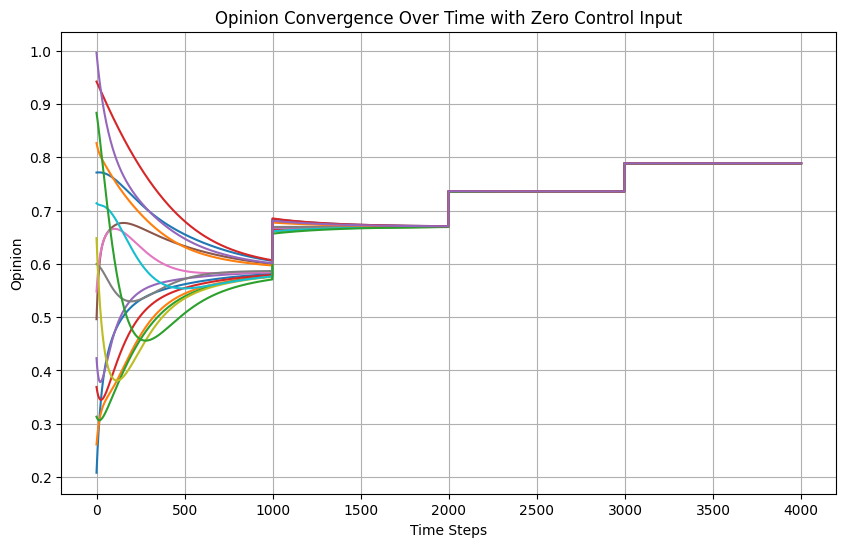

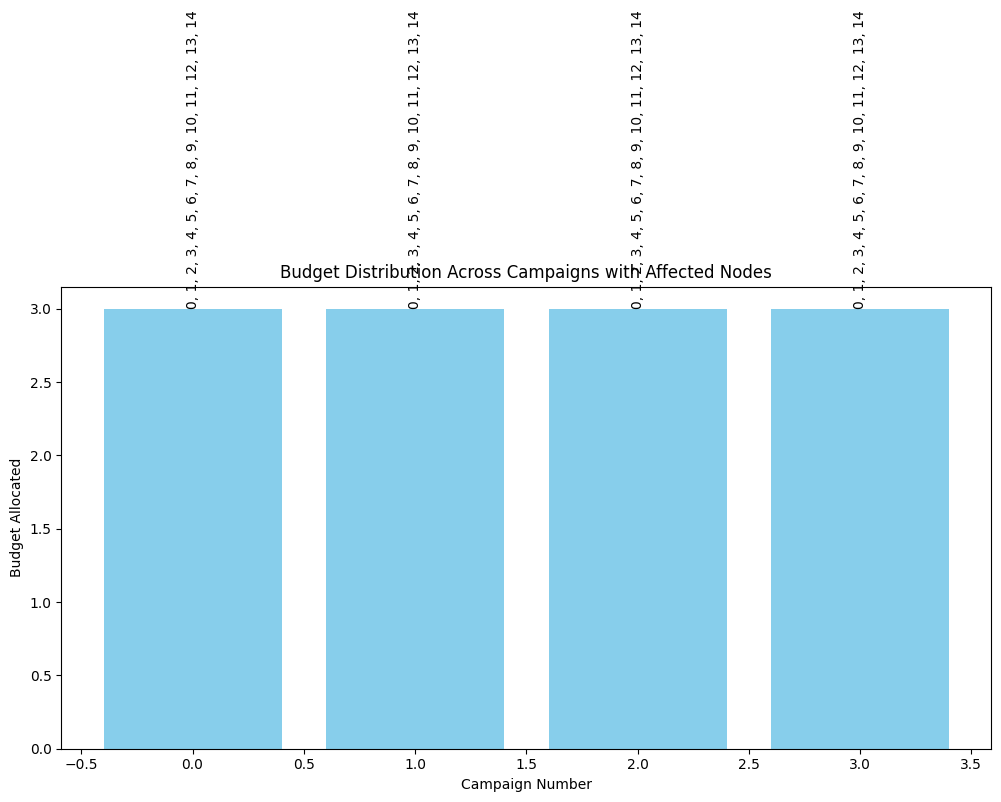

In [152]:
# Example usage for Brute Force Strategy
env = init_env()
num_steps = 4000  # Total number of steps in the simulation
M = 3  # Number of campaigns
Q = 15  # Total budget
campaign_length = 0.5  # Campaign length in continuous time

# Run the experiment with brute force strategy
opinions_over_time, budget_distribution, affected_nodes = run_experiment(
    env, num_steps, M, Q, sample_time=env.tau, strategy='brute_force', campaign_length=campaign_length
)

# Compute errors
overall_error = compute_overall_error(opinions_over_time, env.desired_opinion)
final_error = compute_final_error(opinions_over_time, env.desired_opinion)

print(f"Brute Force Strategy - Overall Error: {overall_error}")
print(f"Final Error: {final_error}")

# Plot opinions over time
plot_opinions_over_time(opinions_over_time)

# Plot budget distribution and affected nodes
plot_budget_distribution(budget_distribution, affected_nodes)


Uncontrolled Case - Overall Error: 30965.272396430188
Final Error: 7.73571573387295


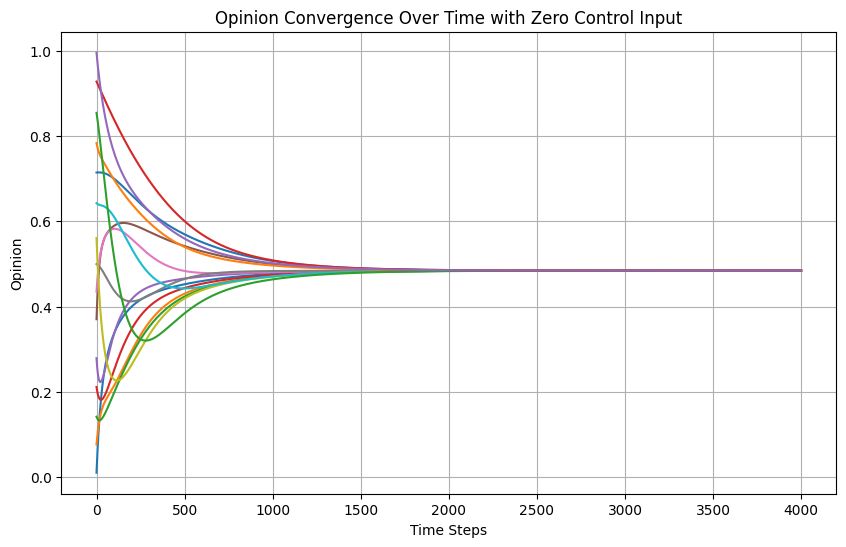

In [141]:
# Example usage for all strategies
env = init_env()
num_steps = 4000  # Total number of steps in the simulation
M = 3  # Number of campaigns
Q = 15  # Total budget
campaign_length = 0.5  # Time step

# Run the experiment with no control (uncontrolled case)
opinions_over_time_uncontrolled = run_uncontrolled_experiment(env, num_steps)
overall_error_uncontrolled = compute_overall_error(opinions_over_time_uncontrolled, env.desired_opinion)
final_error_uncontrolled = compute_final_error(opinions_over_time_uncontrolled, env.desired_opinion)

print(f"Uncontrolled Case - Overall Error: {overall_error_uncontrolled}")
print(f"Final Error: {final_error_uncontrolled}")
plot_opinions_over_time(opinions_over_time_uncontrolled)


Broadcast Strategy - Overall Error: 24772.217917144164
Final Error: 6.188572587098369


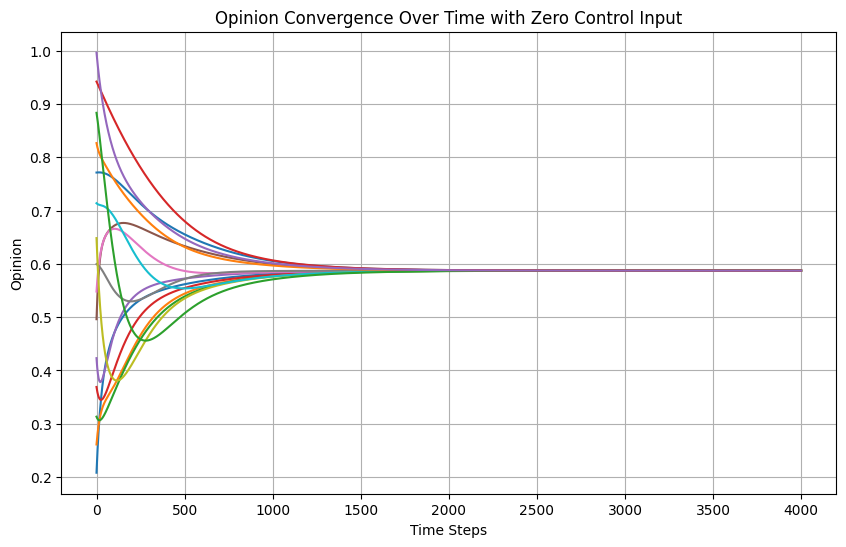

In [142]:
env = init_env()
num_steps = 4000  # Total number of steps in the simulation
Q = 15  # Total budget
broadcast_duration = 1  # Number of steps to apply the max control input

# Run the experiment with the broadcast strategy
opinions_over_time_broadcast = run_broadcast_strategy(env, num_steps, broadcast_duration)
overall_error_broadcast = compute_overall_error(opinions_over_time_broadcast, env.desired_opinion)
final_error_broadcast = compute_final_error(opinions_over_time_broadcast, env.desired_opinion)

print(f"Broadcast Strategy - Overall Error: {overall_error_broadcast}")
print(f"Final Error: {final_error_broadcast}")
plot_opinions_over_time(opinions_over_time_broadcast)
